<p><b><center>Investigating Smooth-Particle Hydrodynamics (SPH) with Python</center></b></p>

<u>Table of Contents</u>
1. Introduction
2. Modelling
3. The $n$-body model
4. The dam break model
5. Extensions (no longer needed)
6. Conclusion
7. References
8. Appendices

# Introduction
## Fluid dynamics: why bother?
[Fluid dynamics](https://en.wikipedia.org/wiki/Fluid_dynamics) is, broadly speaking, the study of how fluids flow. Understanding how fluids flow is important for many specializations in engineering. Here are some interesting applications of fluid dynamics:
1. [Biomedical Engineering](https://pubmed.ncbi.nlm.nih.gov/34476751/): the design of medical equipment such as vascular stents relies on a good understanding of how blood flows in the body.
2. [Disaster Protection](https://link.springer.com/chapter/10.1007/978-3-211-69356-8_1): tsunami forecasting and risk evaluation requires a good understanding of how the oceans move.
3. [Industrial Design](https://www.dynamiq-eng.co.uk/pages/Fluid_mechanics_dynamics.php): building safe, efficient, and functioning equipment needs a good understanding of how "fluids" such as heat and pressure change over time.
4. [Astrophysics](https://arxiv.org/abs/1109.2219): somewhat surprisingly, we can model space as a fluid as well.

## Fluid dynamics: how to implement?
As with anything in science, we first begin our study of fluid dynamics by learning how to model it. Fluids are typically modelled as _continuous_, meaning that we treat them as a continuous mass, rather than a set of discrete particles. Consider a mole of water - is it easier to think of it as $18ml$ of water or $\sim 6\times10^{23}$ water molecules interacting with each other?

In our simplified models, these bodies of water then obey several assumptions relating quantities such as their pressure, density, volume, and mass. We briefly list some assumptions, taken from [Wikipedia](https://en.wikipedia.org/wiki/Fluid_mechanics):
1. Conservation of mass
2. Conservation of energy
3. Conservation of momentum
4. The continuum assumption

We can explain what these assumptions mean using a simple bowl of water taken from [Shutterstock](https://www.shutterstock.com/image-vector/water-bowl-illustration-vector-cartoon-260nw-2210641359.jpg).

![](https://www.shutterstock.com/image-vector/water-bowl-illustration-vector-cartoon-260nw-2210641359.jpg)

**Conservation of mass**: the amount of water in the bowl will not change (unless we pour some water out, or pour some water in).

**Conservation of energy**: the energy of the water in the bowl will not change (assuming the bowl is an inch thick shell of $Bi_4O_4SeCl_2$, the [worst known heat conductor in the world](https://www.sciencealert.com/sustainability-win-scientists-make-material-with-the-lowest-thermal-conductivity-yet), preventing the heat energy of the water from moving to its surroundings).

**Conservation of momentum**: the total momentum of the water remains constant, assuming that the bowl is a closed system.

**The continuum assumption**: the body of water is a continuous distribution of matter, where properties such as pressure ["may vary point-by-point."](http://pillars.che.pitt.edu/student/slide.cgi?course_id=10&slide_id=5.0) A better example than our bowl of water would the ocean - the temperature of the water on the beaches of Delhi is different from the temperature of the water on the shores of Normandy, even though the oceans can be thought of as a continuous distribution of water.

With these assumptions, we can then proceed to model the various properties of the fluid using a simple set of equations. [NASA](https://www.grc.nasa.gov/www/k-12/airplane/nseqs.html) has provided a helpful graphic showing the equations we use:

![](https://www.grc.nasa.gov/www/k-12/airplane/Images/nseqs.gif)

Oh.

## Practical fluid dynamics: challenges
If we are to follow the equations in the NASA graphic, we are going to have one hell of a time trying to solve anything. Solving a single partial differential equation (PDE) is tough enough on its own, and solving several linked PDEs is very very hard. If we are to try to solve it by hand, we quickly realize that doing so is an [open problem with a bounty of a million dollars](https://en.wikipedia.org/wiki/Navier–Stokes_existence_and_smoothness).

The challenges are obvious, and seemingly insurmountable. Despite this, engineers and scientists have been successfully surmounting them for decades. How?

## Practical fluid dynamics: approaches
Enter [computational fluid dynamics](https://www.simscale.com/docs/simwiki/cfd-computational-fluid-dynamics/what-is-cfd-computational-fluid-dynamics/), or CFD for short. To explain CFD, we briefly return to secondary school calculus. We recall the geometric intuition behind differentiation - differentiating our function gives us the rate of change of the function, and partial differential equations are nothing but lots of differentiation.

In an ideal world, the derivative $f'(x)$ of a function $f(x)$ is given by the equation $$f'(x)=\lim_{h\to 0}\frac{f(x+h)-f(x)}{h}.$$ In our unideal world, we can set the value of $h$ to $0.005$ (an arbitrary number), and declare that to be the rate of change over time. In other words, we set our time step to $0.005$ seconds (or any other sufficiently small number that you like), and use this to approximate the complicated equations we see above. Informally, we say that we can approximate $f'(x)$ with the following: $$f'(x) \approx \frac{f(x+0.005)-f(x)}{0.005}.$$

This converts the problem from a calculus problem with differentiation and integration to a computational problem, involving millions of addition, subtraction, multiplication, and division operations. To a computer, the latter is much simpler to perform than the former.

This allows us to introduce smooth-particle hydrodynamics (SPH), a computational method that translates the fancy equations to a much uglier, but simpler to compute version.

## SPH: an introduction
The very first thing done in SPH is to take a closer look at the continuum assumption made above. Recall that the continuum assumption for a fluid says that properties such as density and pressure of the fluid may vary throughout the fluid. SPH takes that to an extreme - we can therefore model the fluid as a large collection of particles, each particle having its own properties such as density and pressure.

Now that we have a very large collection of particles, we need to define the interactions between these particles. As Dan Price [writes](https://arxiv.org/abs/1111.1259),

> SPH starts with the answer to the question: "How do I compute a density given a distribution of point-mass particles?"

Recall that density of an object is given by the mass of the object divided by its volume; in other words, we can think of density as how much "stuff" there is in a fixed part of space. In SPH, we assume that the mass of each of our particles is constant. Therefore, the only thing that can affect the density of a particle is the amount of space it occupies.

How then, do we measure this amount of space? Here comes the tricky part! Intuitively, a particle cannot have a changing volume (think about it: do we expect the volume of a water molecule to change over time? No!). However, under the assumptions in SPH, **a particle is defined as a fixed amount of mass**. In other words, **particles do not represent individual molecules**. In reality, each SPH "particle" is a stand-in for something like 10,000 water molecules.

(Remark: the 10,000 figure given above is _wildly_ inaccurate. A mole of water has $\sim 6\times10^{23}$ water molecules, and if we represent only 10,000 water molecules with a particle, we will require _six quintillion_ SPH particles to simulate 18ml of water. It is likely that an SPH particle is a stand in for several gorjillion particles, allowing us to model our fluid systems with a small enough number of particles that our computers will not explode.)

With the knowledge that each SPH particle is actually several gorjillion water molecules, this allows us to introduce the notion of _density_ for an SPH particle. Several gorjillion water molecules are obviously not a point mass, and will occupy a certain amount of space, hence giving us the density of the SPH particle.

## SPH: a practical view
Now that we've introduced the notion of SPH particles, what exactly can we do with them? The short answer is that we can use these SPH particles to model how the fluid changes over time. SPH allows us to derive the equations of motion for each SPH particle given the positions and density of other SPH particles, through the following equation: $$\frac{d\mathbf{v}_i}{dt}=-\sum_j=m_j\left(\frac{P_i}{\rho_i^2}+\frac{P_j}{\rho_j^2}\right)\nabla W(|\mathbf{r}_i-\mathbf{r}_j|,h),$$ where $\frac{d\mathbf{v}_i}{dt}$ is the acceleration of the $i$th particle, $m_j$ is the mass of the $j$th particle, $P_i$ and $P_j$ are the pressures acting on the $i$th and $j$th particles, $\rho_i$ and $\rho_j$ are the densities of the $i$th and $j$th particles, and $\nabla W(|\mathbf{r}_i-\mathbf{r}_j|,h)$ is a smoothing function, which we will explain shortly.

That was a whole chunk of mathematics, but **the key takeaway is that we can compute the acceleration of an SPH particle through a lot of simple mathematical operations (addition, subtraction, division, multiplication), without solving any differential equations.**

### The smoothing function $\nabla W(|\mathbf{r}_i-\mathbf{r}_j|,h)$
The smoothing function is a fancy mathematical way that the particles which are closer to each other have a greater effect on each other. The [gaussian kernel](https://pages.stat.wisc.edu/~mchung/teaching/MIA/reading/diffusion.gaussian.kernel.pdf.pdf) is a commonly used smoothing function that is shaped like a bell curve, with the height of the graph representing the effect of the particles surrounding it.

![](http://www.imagemet.com/WebHelp6/Content/Images/Gauss3D.png)

To use the gaussian kernel, we pick the $i$th particle of the fluid to study, and then we compare its distance to every other particle in the fluid (represented by $|\mathbf{r}_i-\mathbf{r}_j|$), which denotes the effect that the $j$th particle has on the $ith$ particle.

If the $j$th particle is _very, very_ far away, we see from the image that its effect is basically reduced to $0$. However, if the $j$th particle is _very, very_ close, we see that its effect is still relatively strong.

To summarize, the smoothing function is nothing but a fancy way of saying that particles close to each other have a greater effect on each other than particles which are far apart.

## Moving forward
Now that we have a surface understanding of SPH and how it works, lets proceed to implementing it as code.

# Modelling Fluid Dynamics
## Planning the code
Before we jump right into writing code, let's pause and think about _what_ exactly we want from our code. We want to be able to simulate particles with the following properties:
1. A fixed mass
2. A position in space (i.e., 3D coordinates)
3. A direction vector (i.e., another set of 3D coordinates)
4. A density
5. A pressure

Beyond that, we also need to find a way to make these particles interact with each other, so we can perform the calculations required by SPH. Thankfully, we can write out each of these interactions inside a _function_, allowing us to simplify our code. Some of the functions we might require include:
1. A function to calculate the distance between two particles.
2. A function to update the position of a particle in space, given a certain timestep.
3. A function to calculate the change in density of a particle, given the position of the neighbouring particles.

In short, what we require from our code is (a) the ability to store lots of particles, and (b) the ability to work with particles.

## Attempt 1.1: Lists
We start with a naive attempt at turning our particles into code. We can represent our particles as a list in Python:

```
testParticle1 = [mass, xCoord, yCoord, zCoord, xDir, yDir, zDir, density, pressure]
```

Writing our functions to deal with such particles will involve lots of list comprehension.

## Attempt 1.2: Numpy arrays
However, we quickly notice that all these variables are actually of the `float` data type, which means that we can also store the data of the particle within a `numpy` array. This will greatly involve the speed of our calculations, as `numpy` arrays are optimized for dealing with numerical computations.

In [ ]:
# code

## Attempt 2: New data types


- Using a `Particle` data type
- Important variables to store
- Introducing a kernel function

In [ ]:
# code

# The $n$-body problem
Before proceeding to model fluids, we'll start by checking out the [$n$-body problem](https://en.wikipedia.org/wiki/N-body_problem), a classic demonstration of the types of computation in SPH. The $n$-body problem has a relatively simple statement: given a bunch of particles which interact with each other through the gravitational force of attraction, predict their movement in 3D space over time.

- Problem statement
- Code implementation
- Pretty pictures
- Problems with naive implementation of $n$-body problem

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
# this function update the coordinates and velocities of all particles 
def update_particles(particles,t):
    G=1
    n=len(particles)
    mass=np.array([particles[i,0] for i in range(n)])
    coordinates=np.array([particles[i,1:4] for i in range(n)])
    velocity=np.array([particles[i,4:7] for i in range(n)])
    # calculate acceleration when looking at interaction between the mth and nth particle 
    def acceleration_between_2_points(m,n):
        return mass[m]*(coordinates[m]-coordinates[n])/(np.sqrt(sum((coordinates[m]-coordinates[n])**2)))**3

    # calculate acceleration for the mth particle taking all other particles into consideration 
    def get_acceleration(m):
        other_indices = list(range(n))
        other_indices.remove(m)
        acceleration=np.zeros((3))
        for i in other_indices:
            acceleration += acceleration_between_2_points(m,i)
        return acceleration 

    # generate array storig acceleration 
    acceleration_array=np.array([get_acceleration(i) for i in range(n)])

    # generate array storing change in velocity 
    final_velocity_array=velocity+acceleration_array*t
    
    # generate array storing displacement 
    displacement_array=velocity*t+0.5*acceleration_array*t**2
    
    # update coordinates 
    particles[:,1:4] += displacement_array

    # update velocity 
    particles[:,4:7] = final_velocity_array 
    
    # return the updated particles 
    return particles 


def plot_n_body(particles, accuracy, time):
# particles: a 2D list storing all the infomation of the particles 
# accuracy: delta t
# time: total length of time that pass 
    data_list=[]
    n=len(particles)
    iteration_no=int(time/accuracy)

    # 1: data generation, expected out put is data_list, a 3D array 
    for i in range(iteration_no):
        # 1.1: stroing particles information 
        data_list.append(particles[:,1:4].copy())
        # 1.2: update particles information 
        particles=update_particles(particles, accuracy)
    data_list=np.array(data_list)

    # 2: plotting 
    ax = plt.axes(projection='3d')
    for i in range(n):
        x=data_list[:,i,0]
        y=data_list[:,i,1]
        z=data_list[:,i,2]
        ax.plot3D(x, y, z)
    plt.show()

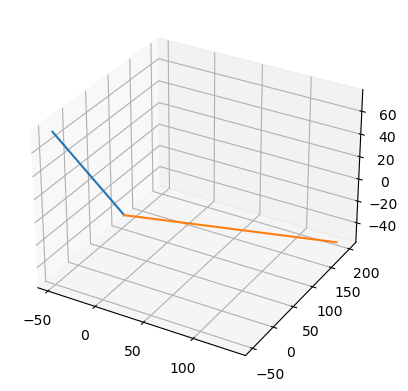

In [4]:
particles=np.array([[1,0.3,0.4,0.3,0.1,0.6,0.1],
                    [1,0.4,0.7,0.1,0.8,0.9,0.1],
                   ])
plot_n_body(particles, 0.005, 100)

# The dam break model
The [dam break problem](https://www.worldscientific.com/doi/pdf/10.1142/9789813223882_0001) is a classic problem in fluid dynamics that, as the name suggests, simulates what happens when a dam is suddenly broken. In the dam break problem, a body of water is initially contained in an area, and the simulation starts when the walls containing the body of water are removed (the dam breaking).

[sad](https://pysph.readthedocs.io/en/latest/design/overview.html?highlight=dam%20break#the-dam-break-problem)

- Problem statement
- Code implementation
- Pretty pictures
- Explanation of why SPH is good

Below we use a commercial solution, the [PySPH package](https://pysph.readthedocs.io) which comes with nearly 100 inbuilt test cases. 

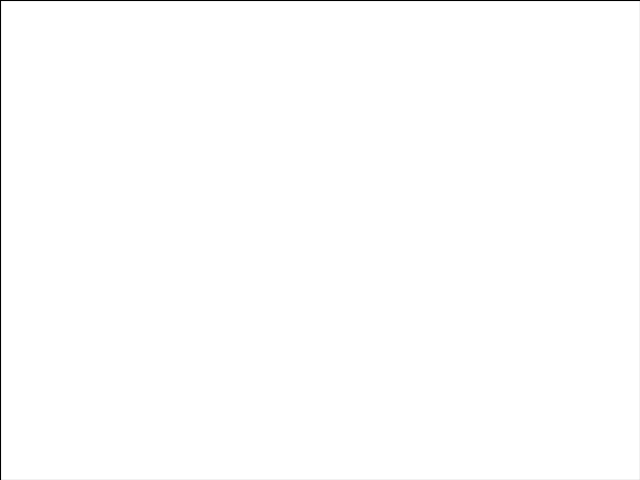

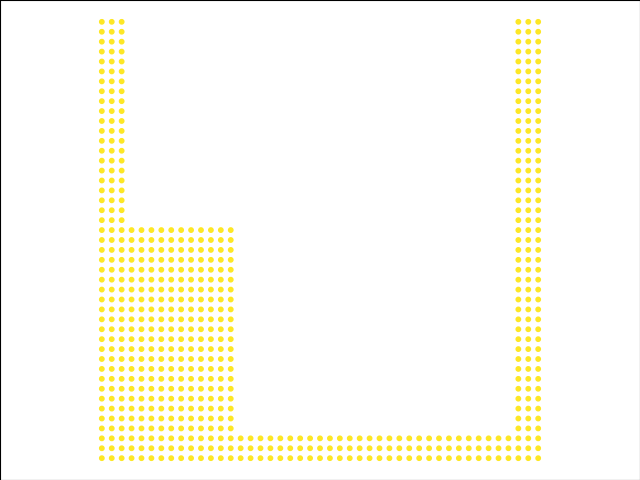

In [8]:
%matplotlib ipympl

from matplotlib import pyplot as plt
from pysph.tools.ipy_viewer import Viewer2D

viewer = Viewer2D('db2d_output')
viewer.interactive_plot()

# Extensions (no longer in use)
This particular project has room for extensions in two main areas: the optimization of the code, and the application of SPH to more systems. We'll briefly explore both types of extension in this section.

## Code optimization
Broadly speaking, we can always optimize our code in three ways: reducing the time taken to run the code, reducing the space taken to run the code, and improving the readability of the code to the reader. The first two are technical challenges, while the last involves design philosophy as well.

By using `numpy` arrays, we are able to perform significant optimizations to the running time of the program, as `numpy` arrays are much faster for numerical calculations.



## Application to new systems
In this notebook, we've only used SPH to model the dam break model in two dimensions. An obvious extension would be modelling the dam break problem in three dimensions. In general, we can extend the techniques here to any system that can be studied as a fluid. For example, [several movie scenes](https://theconversation.com/superman-returns-but-whos-looking-after-his-water-680) involving fluids have been modelled using SPH, allowing film makers to bring epic shots to the big screen.

One crazy extension of our SPH project would be to model space as a [four-dimensional incompressible inviscid fluid](https://osf.io/2y3t5).

# Conclusion
To summarize, our goal in this notebook has been to demonstrate the use of SPH in modelling fluid dynamics in Python. Finding exact solutions to the equations behind fluid dynamics is a notoriously tough problem, which has lead us to the use of numerical approximations to perform calculations.

This brings us to the crux of SPH, which allows us to approximate the solutions to the fluid equations. 

# References
ACS citation style.

# Appendices
- Zhen Jie's explanation of the science
- Any other supplementary nonsense or further extensions of the work above.